In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [3]:
#import data
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    initial_prices = stockData.iloc[-1].values
    return meanReturns, covMatrix, initial_prices
    

In [4]:
stockList = ['ONGC', 'NIFTYBEES','KTKBANK','SUZLON']
shares = np.array([4, 3, 1, 10])
stocks = [stock + '.NS' for stock in stockList]
endDate = dt.datetime.now() - dt.timedelta(days = 100)
startDate = endDate - dt.timedelta(days = 400)

In [5]:
meanReturns, covMatrix, initial_prices = get_data(stocks, startDate, endDate)

C:\Users\dines\AppData\Local\Temp\ipykernel_8396\3412238011.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stockData = yf.download(stocks, start, end)
[*********************100%***********************]  4 of 4 completed


In [6]:
weight = np.random.random(len(meanReturns))
weight /= np.sum(weight)

In [7]:
# Monte Carlo Method
mc_sims = 100
T = 100 # time frame in days

meanM = np.full(shape=(T, len(weight)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initial_port = 2016

for m in range(mc_sims):
    Z = np.random.normal(size=(T, len(weight)))
    L = np.linalg.cholesky(covMatrix)
    daily_returns = meanM + np.inner(L, Z)
    
    portfolio_returns = np.inner(weight, daily_returns.T)
    portfolio_sims[:, m] = initial_port * np.cumprod(1 + portfolio_returns)

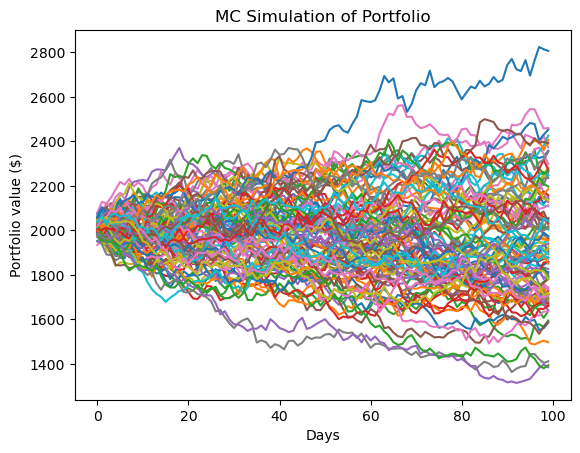

In [8]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('MC Simulation of Portfolio')
plt.show()

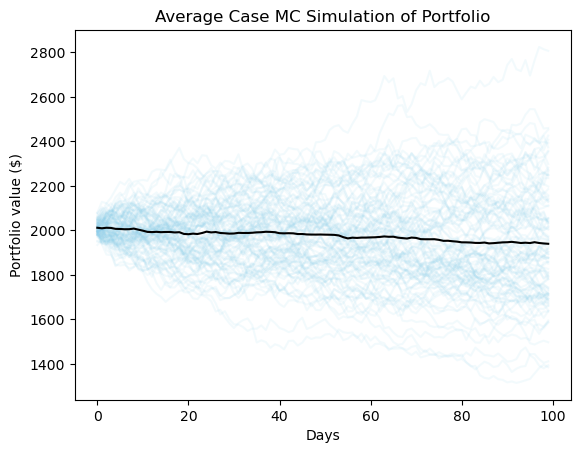

In [9]:
mean_portfolio = portfolio_sims.mean(axis=1)

plt.plot(portfolio_sims, color='skyblue', alpha=0.1)
plt.plot(mean_portfolio, color='black', label='Mean Portfolio Value')
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('Average Case MC Simulation of Portfolio')
plt.show()


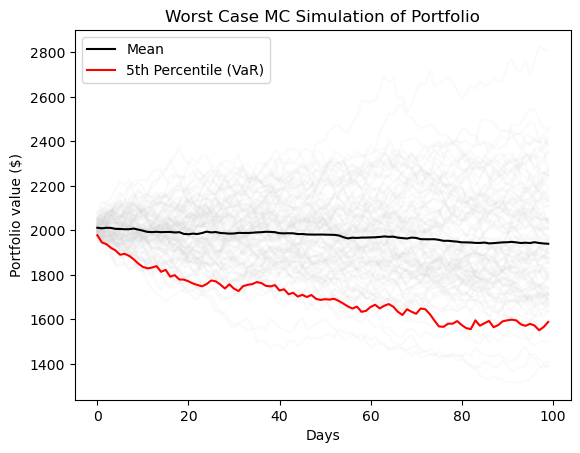

In [10]:
percentile_5 = np.percentile(portfolio_sims, 5, axis=1)

plt.plot(portfolio_sims, color='lightgray', alpha=0.1)
plt.plot(mean_portfolio, color='black', label='Mean')
plt.plot(percentile_5, color='red', label='5th Percentile (VaR)')
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('Worst Case MC Simulation of Portfolio')
plt.legend()


Text(0, 0.5, 'Frequency')

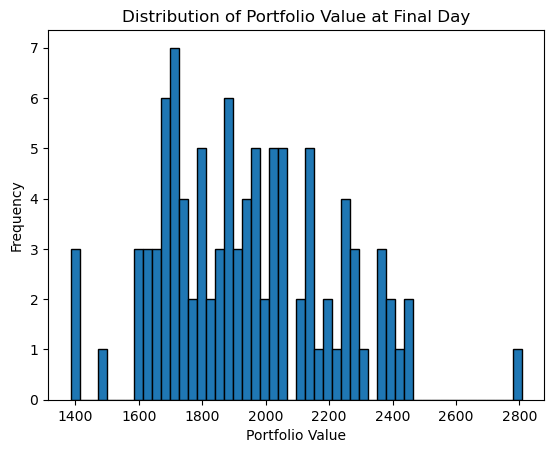

In [11]:
plt.hist(portfolio_sims[-1], bins=50, edgecolor='k')
plt.title('Distribution of Portfolio Value at Final Day')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')


In [12]:
def mcVar(returns , alpha = 5):
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected pandas Data Series")

In [13]:
def mcCVar(returns , alpha = 5):
    if isinstance(returns, pd.Series):
        belowvar = returns <= mcVar(returns, alpha)
        return returns[belowvar].mean()
    else:
        raise TypeError("Expected pandas Data Series")

In [14]:
portResults = pd.Series(portfolio_sims[-1, :])
Var = initial_port - mcVar(portResults, alpha=5)
CVar = initial_port - mcCVar(portResults, alpha=5)

In [15]:
Var

427.19649919728954

In [16]:
CVar

560.8817634848197